## Reading in transient data

For this example, we are using AT2017gfo data, including two filters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in AT2017gfo data
lc = pd.read_csv('data/villar_kn_redshift0.01_mjd57982.csv')
lc

,day,mjd,filt,mag,magerr
0,1,57983,i,17.235234,0.0028
1,2,57984,i,17.952256,0.0045
2,3,57985,i,18.647768,0.0075
3,4,57986,i,18.988473,0.0126
4,5,57987,i,19.320973,0.0163
5,6,57988,i,19.743586,0.0248
6,7,57989,i,20.251442,0.0235
7,8,57990,i,20.817951,0.0331
8,9,57991,i,21.399131,0.0730
9,10,57992,i,21.939768,0.1603


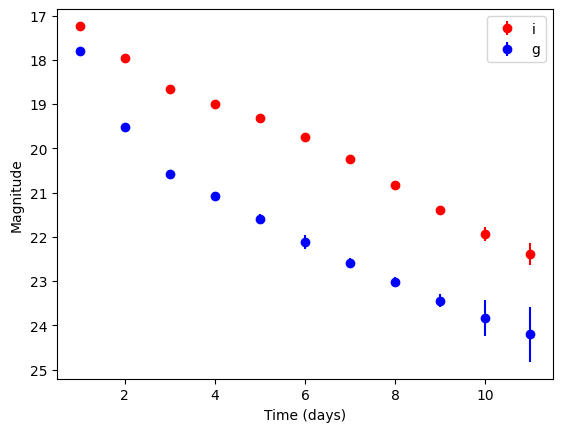

In [3]:
# plot light curve
colordic = {'i':'red', 'g':'blue'}

for filt in lc['filt'].unique():
    plt.errorbar(lc[lc['filt'] == filt]['day'].astype(float), lc[lc['filt'] == filt]['mag'].astype(float), 
                 lc[lc['filt'] == filt]['magerr'].astype(float),ls = '', marker='o', color=colordic[filt], label=filt)

plt.ticklabel_format(useOffset=False, style='plain')
plt.gca().invert_yaxis()
plt.xlabel('Time (days)')
plt.ylabel('Magnitude')
plt.legend()

In [4]:
# Just using a dummy limiting magnitude value here
# Can exchange with last magnitude prior to outburst
lim_mag = 24.5

# Calculate simple light curve parameters
i_peak = np.min(lc[lc['filt'] == 'i']['mag'])
g_peak = np.min(lc[lc['filt'] == 'g']['mag'])
i_peak_mjd = lc.iloc[np.where((lc['mag'] == i_peak) & (lc['filt'] == 'i'))]['mjd'].iloc[0]
g_peak_mjd = lc.iloc[np.where((lc['mag'] == g_peak) & (lc['filt'] == 'g'))]['mjd'].iloc[0]

i_rise = (i_peak - lim_mag) / 1
g_rise = (g_peak - lim_mag) / 1

i_faint = np.max(lc[lc['filt'] == 'i']['mag'])
g_faint = np.max(lc[lc['filt'] == 'g']['mag'])
i_faint_mjd = lc.iloc[np.where((lc['mag'] == i_faint) & (lc['filt'] == 'i'))]['mjd'].iloc[0]
g_faint_mjd = lc.iloc[np.where((lc['mag'] == g_faint) & (lc['filt'] == 'g'))]['mjd'].iloc[0]

i_fade = (i_faint - i_peak) / (i_faint_mjd - i_peak_mjd)
g_fade = (g_faint - g_peak) / (g_faint_mjd - g_peak_mjd)


print('=============================')
print('TRANSIENT RISE AND FADE RATES')
print('=============================')
print('')
print('i-band rise: ', i_rise)
print('g-band rise: ', g_rise)

print('')
print('i-band fade: ', i_fade)
print('g-band fade: ', g_fade)

print('')
print(f'In i-band, the transient peaked at {i_peak_mjd} MJD and faded until {i_faint_mjd} MJD')
print(f'In g-band, the transient peaked at {g_peak_mjd} MJD and faded until {g_faint_mjd} MJD')

TRANSIENT RISE AND FADE RATES

i-band rise:  -7.2647655695166335
g-band rise:  -6.694100050790848

i-band fade:  0.5153177032516943
g-band fade:  0.6401340823138831

In i-band, the transient peaked at 57983 MJD and faded until 57993 MJD
In g-band, the transient peaked at 57983 MJD and faded until 57993 MJD


## Fitting a basic polynomial

Fitting two bands (i and g) separately, through different polynomial orders and calculating parameters

### 1st order polynomial

In [5]:
# Select x-axis data in the i-band
x_i = np.array(lc[lc['filt'] == 'i']['day'])

# Select y-axis data in the i-band
y_i = np.array(lc[lc['filt'] == 'i']['mag'])
y_i = [float(x) for x in y_i]
y_i_err = np.array(lc[lc['filt'] == 'i']['magerr'])
y_i_err = [float(x) for x in y_i_err]


# Select x-axis data in the g-band
x_g = np.array(lc[lc['filt'] == 'g']['day'])

# Select y-axis data in the g-band
y_g = np.array(lc[lc['filt'] == 'g']['mag'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(lc[lc['filt'] == 'g']['magerr'])
y_g_err = [float(x) for x in y_g_err]

In [6]:
# fit polynomial and create poly1d polynomial objects with z coefficients 
z_i = np.polyfit(x_i, y_i, 1)
p_i = np.poly1d(z_i)

z_g = np.polyfit(x_g, y_g, 1)
p_g = np.poly1d(z_g)

y_i = 
 
0.496 x + 16.9

y_g = 
 
0.5707 x + 18.37



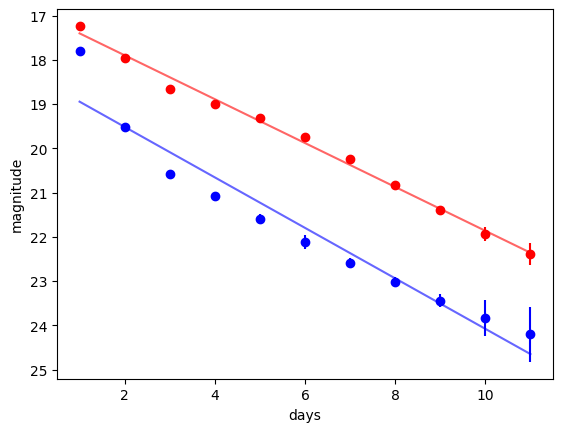

In [7]:
# plot polynomial fit

xp = np.linspace(1, 11, 100)

plt.errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
plt.plot(xp, p_i(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i))
print()

plt.errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
plt.plot(xp, p_g(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g))
print()

plt.xlabel('days')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()

### Testing a higher order polynomial

In [8]:
# fit another polynomial, now using 4th order in this example
z_i = np.polyfit(x_i, y_i, 4)
p_i = np.poly1d(z_i)

z_g = np.polyfit(x_g, y_g, 4)
p_g = np.poly1d(z_g)

y_i = 
           4           3          2
-0.001441 x + 0.03751 x - 0.3264 x + 1.555 x + 15.95

y_g = 
           4           3          2
-0.001974 x + 0.05601 x - 0.5759 x + 2.984 x + 15.38



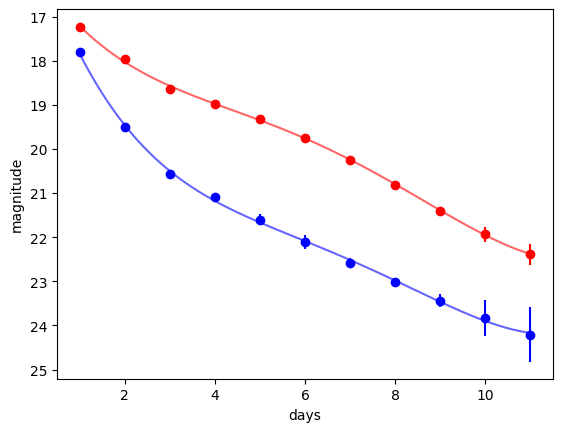

In [9]:
xp = np.linspace(1, 11, 100)

plt.errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
plt.plot(xp, p_i(xp), 'r-', alpha=0.6)
print('y_i = ')
print(np.poly1d(p_i))
print()

plt.errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
plt.plot(xp, p_g(xp), 'b-', alpha=0.6)
print('y_g = ')
print(np.poly1d(p_g))
print()

plt.xlabel('days')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()

### Looping over polynomial orders to test paramters

To quickly fit and compare different polynomial orders, a grid of polynomial fits of orders 2 to 13 is created. For each fit, light curve properties are also calculated

In [10]:
def polynomial_fit(x_i, y_i, x_g, y_g, order):
    """
    Fit a polynomial to the i and g band data for a given polynomial order
    
    """

    z_i = np.polyfit(x_i, y_i, order)
    p_i = np.poly1d(z_i)

    z_g = np.polyfit(x_g, y_g, order)
    p_g = np.poly1d(z_g)

    return p_i, p_g

In [11]:
def find_peak_mag(p, xp):
    """
    Calculate the peak magnitude for a polynomial object, and x-axis data
    
    """
    
    peak_mag = np.min(p(xp))
    return peak_mag

In [12]:
def find_peak_time(p, xp, peak_mag):
    """
    Calculate the time of outburst peak for a polynomial object, given the peak magnitude
    
    """

    poly_arr = p(xp)
    peak_idx = np.abs(poly_arr - peak_mag).argmin()

    peak_time = xp[peak_idx]

    return(peak_time)

In [13]:
def find_t2(x, y, order, peakmag, peaktime, threshold=1E-6):
    """
    Calculate the time it takes to fade 2(3) magnitudes from peak, t2(t3), by taking the roots of the 
    derivative of an offset polynomial fit.
    
    """
    
    r = np.roots(np.polyfit(x, y - (peakmag+2), order))

    roots = np.sort(r.real[abs(r.imag) < threshold])
    # print('t2 roots:', roots)
    time_t2 = roots[(roots > 0) & (roots < 10)][0]
    # print(time_t2)
    t2 = time_t2 - peaktime

    r = np.roots(np.polyfit(x, y - (peakmag+3), order))

    roots = np.sort(r.real[abs(r.imag) < threshold])
    # print('t3 roots:', roots)
    time_t3 = roots[(roots > 0) & (roots < 10)][0]
    # print(time_t3)
    t3 = time_t3 - peaktime

    return t2, t3

In [14]:
# redefining x and y data for both filters

x_i = np.array(lc[lc['filt'] == 'i']['day'])

y_i = np.array(lc[lc['filt'] == 'i']['mag'])
y_i = [float(x) for x in y_i]
y_i_err = np.array(lc[lc['filt'] == 'i']['magerr'])
y_i_err = [float(x) for x in y_i_err]

x_g = np.array(lc[lc['filt'] == 'g']['day'])

y_g = np.array(lc[lc['filt'] == 'g']['mag'])
y_g = [float(x) for x in y_g]
y_g_err = np.array(lc[lc['filt'] == 'g']['magerr'])
y_g_err = [float(x) for x in y_g_err]

-- polynomial order 2 --
i-band peak mag:  17.42
g-band peak mag:  18.29

i-band peak time:  1.0
g-band peak time:  1.0

i-band amplitude: 7.08
g-band amplitude: 6.21

i band rise rate: inf
g band rise rate: inf
i band fade rate: 2.36
g band fade rate: 2.07

i-band t2:  4.1
g-band t2:  2.2
i-band t3:  6.12
g-band t3:  3.52


-- polynomial order 3 --
i-band peak mag:  17.32
g-band peak mag:  17.98

i-band peak time:  1.0
g-band peak time:  1.0

i-band amplitude: 7.18
g-band amplitude: 6.52

i band rise rate: inf
g band rise rate: inf
i band fade rate: 2.39
g band fade rate: 2.17

i-band t2:  3.77
g-band t2:  1.61
i-band t3:  6.01
g-band t3:  2.76


-- polynomial order 4 --
i-band peak mag:  17.21
g-band peak mag:  17.84

i-band peak time:  1.0
g-band peak time:  1.0

i-band amplitude: 7.29
g-band amplitude: 6.66

i band rise rate: inf
g band rise rate: inf
i band fade rate: 2.43
g band fade rate: 2.22

i-band t2:  3.63
g-band t2:  1.32
i-band t3:  5.94
g-band t3:  2.45


-- polynomial o

/tmp/ipykernel_2864/158871661.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  rise_rate_i = amp_i / (peaktime_i - x_i[0])
/tmp/ipykernel_2864/158871661.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  rise_rate_g = amp_g / (peaktime_g - x_g[0])
/tmp/ipykernel_2864/1804148621.py:7: RankWarning: Polyfit may be poorly conditioned
  z_i = np.polyfit(x_i, y_i, order)
/tmp/ipykernel_2864/1804148621.py:10: RankWarning: Polyfit may be poorly conditioned
  z_g = np.polyfit(x_g, y_g, order)
/tmp/ipykernel_2864/2925750937.py:8: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - (peakmag+2), order))
/tmp/ipykernel_2864/2925750937.py:16: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - (peakmag+3), order))
/tmp/ipykernel_2864/2925750937.py:8: RankWarning: Polyfit may be poorly conditioned
  r = np.roots(np.polyfit(x, y - (peakmag+2), order))
/tmp/ipykernel_2864/2925750937.py:16: RankWarning: Polyfit

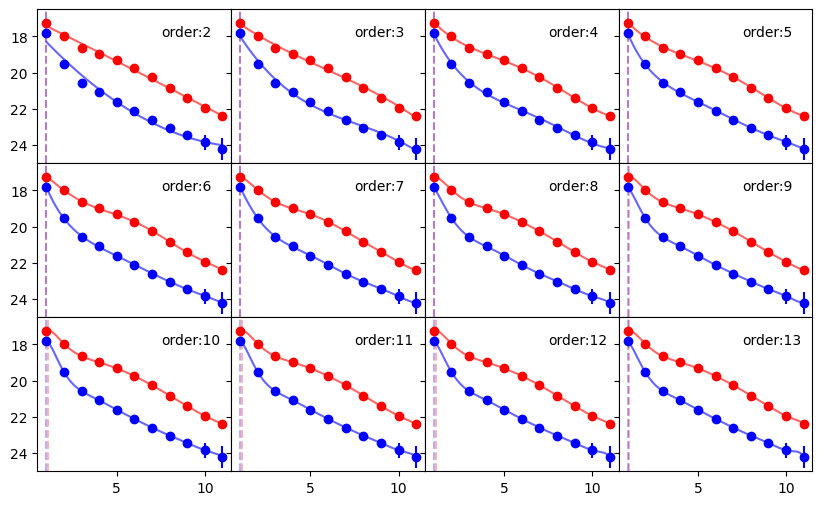

In [15]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

order = 2
for i in np.arange(0,3):
    for j in np.arange(0,4):

        # calculate polynomial
        p_i, p_g = polynomial_fit(x_i, y_i, x_g, y_g, order)

        # add to subplot
        xp = np.linspace(1, 11, 100)
                
        ax[i,j].errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r')
        ax[i,j].plot(xp, p_i(xp), 'r-', alpha=0.6)
        
        ax[i,j].errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b')
        ax[i,j].plot(xp, p_g(xp), 'b-', alpha=0.6)

        ax[i,j].set_xlim(0.5,11.5)
        ax[i,j].set_ylim(25, 16.5)

        ax[i,j].text(7.5 ,18, f'order:{order}')

        print(f'-- polynomial order {order} --')
        # calculate parameters
        peakmag_i = find_peak_mag(p_i,xp)
        peakmag_g = find_peak_mag(p_g,xp)
        print('i-band peak mag: ', round(peakmag_i,2))
        print('g-band peak mag: ', round(peakmag_g,2))
        print('')

        amp_i = lim_mag - peakmag_i
        amp_g = lim_mag - peakmag_g
        
        peaktime_i = find_peak_time(p_i,xp,peakmag_i)
        peaktime_g = find_peak_time(p_g,xp,peakmag_g)
        print('i-band peak time: ', round(peaktime_i,2))
        print('g-band peak time: ', round(peaktime_g,2))
        print('')

        print('i-band amplitude:', round(amp_i,2))
        print('g-band amplitude:', round(amp_g,2))
        print('')

        rise_rate_i = amp_i / (peaktime_i - x_i[0])
        rise_rate_g = amp_g / (peaktime_g - x_g[0])
        
        fade_rate_i = amp_i / (x_i[3] - peaktime_i)
        fade_rate_g = amp_g / (x_g[3] - peaktime_g)

        print('i band rise rate:', round(rise_rate_i,2))
        print('g band rise rate:', round(rise_rate_g,2))
        print('i band fade rate:', round(fade_rate_i,2))
        print('g band fade rate:', round(fade_rate_g,2))
        print('')

        t2_i, t3_i = find_t2(x_i, y_i, order, peakmag_i, peaktime_i)
        t2_g, t3_g = find_t2(x_g, y_g, order, peakmag_g, peaktime_g)
        print('i-band t2: ', round(t2_i,2))
        print('g-band t2: ', round(t2_g,2))
        print('i-band t3: ', round(t3_i,2))
        print('g-band t3: ', round(t3_g,2))
        
        print('')
        print('======================')
        print('')

        # increase polynomial order
        order += 1

        ax[i,j].axvline(peaktime_i, c='r',ls='--', alpha=0.3)
        ax[i,j].axvline(peaktime_g, c='b',ls='--', alpha=0.3)
        
fig.subplots_adjust(wspace=0, hspace=0)

## Colour evolution

In [16]:
p_i, p_g = polynomial_fit(x_i, y_i, x_g, y_g, 4)

In [17]:
g_i_diff = [g - i for g, i in zip(y_g, y_i)]

g_i_diff_err = [np.sqrt(g**2 + i**2) for g, i in zip(y_g_err, y_i_err)]

Text(0, 0.5, 'g-i magnitude')

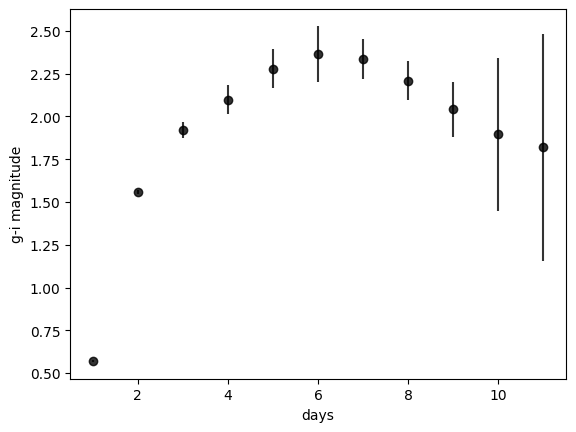

In [21]:
plt.errorbar(x_i, g_i_diff, g_i_diff_err, marker='o', ls='', c='k', alpha=0.8)

# can ucomment below line to see colourmap of colour evolution overplotted onto datapoints
# plt.scatter(x_i, g_i_diff, marker='o', ls='', c=g_i_diff, cmap='bwr', zorder=10)

plt.xlabel('days')
plt.ylabel('g-i magnitude')

### Combining with light curve

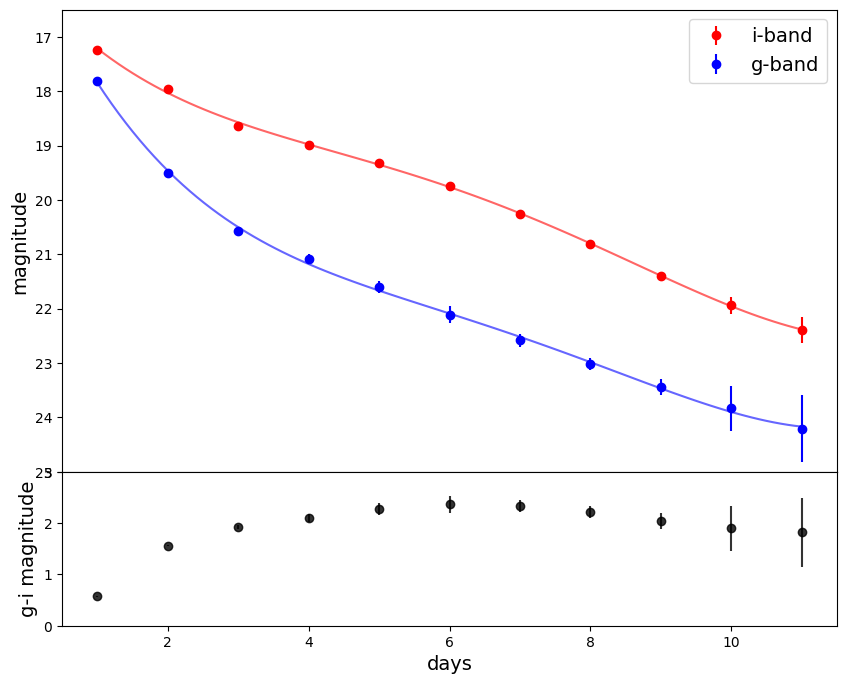

In [19]:
fig, ax = plt.subplots(2,1, sharex='all', gridspec_kw={'height_ratios': [3,1]}, figsize=[10,8])
fig.subplots_adjust(wspace=0, hspace=0)

xp = np.linspace(1, 11, 100)

ax[0].errorbar(x_i, y_i, y_i_err, marker='o', ls='', c='r', label='i-band')
ax[0].plot(xp, p_i(xp), 'r-', alpha=0.6)
ax[0].errorbar(x_g, y_g, y_g_err, marker='o', ls='', c='b', label='g-band')
ax[0].plot(xp, p_g(xp), 'b-', alpha=0.6)
ax[0].set_ylabel('magnitude', fontsize='14')
ax[0].set_ylim(25, 16.5)
ax[0].legend(fontsize='14')

ax[1].errorbar(x_i, g_i_diff, g_i_diff_err, marker='o', ls='', c='k', alpha=0.8)
ax[1].set_ylabel('g-i magnitude', fontsize='14')
ax[1].set_ylim(3,0)


# plt.xlim(-0.1,8)
plt.xlabel('days', fontsize='14')
plt.gca().invert_yaxis()